# Goals
- [ ] Create a Linear Regression Function

In [1]:
import pandas as pd
# ----

df = pd.read_csv("") # Insert CSV here

df = df.fillna(0)

display(df)

FileNotFoundError: [Errno 2] No such file or directory: ''


Regression Equation for X1:
Y = 367.64 + -0.22 * X1

R-squared for X1: 0.0715


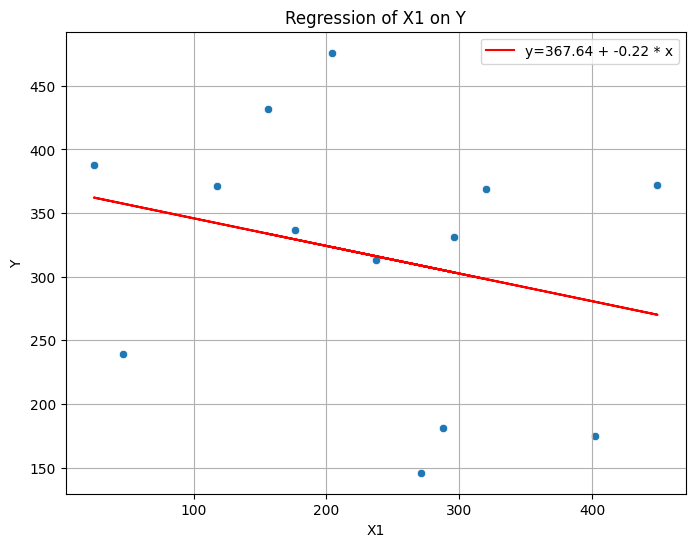


Regression Equation for X2:
Y = 318.37 + -0.00 * X2

R-squared for X2: 0.0000


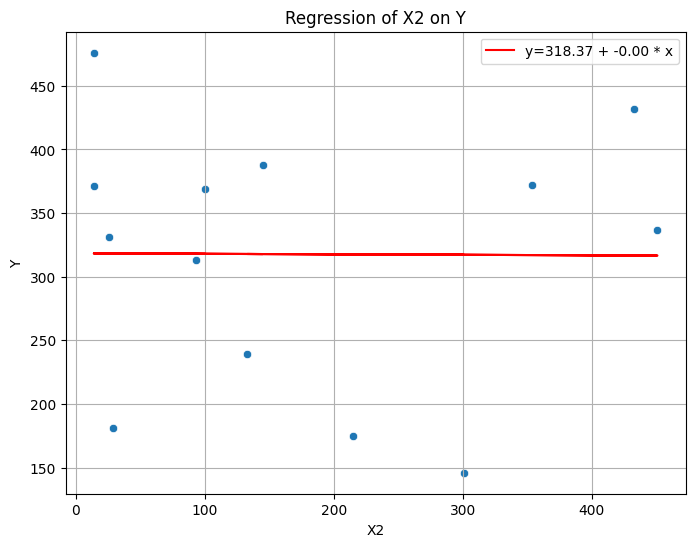

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

## Simple Scatter Plot V2

def show_scatter_plot(X_column, Y_column, dataframe):
  X = dataframe[X_column]
  Y = dataframe[Y_column]

  slope, intercept, r, p, std_err = stats.linregress(X, Y)

  def predict_where_x_is(X):
    return slope * X + intercept

  my_model = list(map(predict_where_x_is, X))

  plt.scatter(X, Y)
  plt.plot(X, my_model)
  plt.show()

# ----

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Simple Scatter Plot 

def showScatterPlotWithLinearReg(X_column, Y_column, df):
  X = df[[X_column]]
  Y = df[Y_column]

  # Fit the model
  model = LinearRegression().fit(X, Y)
  predictions = model.predict(X)

  # Create the scatterplot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=df, x=X_column, y=Y_column)

  # Add the regression line
  intercept = model.intercept_
  coef = model.coef_[0]

  line = model.predict(df[[X_column]])
  plt.plot(df[X_column], line, 'r', label=f'y={intercept:.2f} + {coef:.2f} * x')

  print(f"\nRegression Equation for {X_column}:")
  print(f"{Y_column} = {intercept:.2f} + {coef:.2f} * {X_column}")
  print(f"\nR-squared for {X_column}: {r2_score(Y, predictions):.4f}")

  plt.legend()
  plt.title(f'Regression of {X_column} on {Y_column}')
  plt.grid(True)
  plt.show()

# ----

def testing():
  import random
  
  x1 = [random.randint(1, 500) for _ in range(13)]
  x2 = [random.randint(1, 500) for _ in range(13)]
  y = [random.randint(1, 500) for _ in range(13)]

  new_list = list(zip(x1, x2, y))

  myDF = pd.DataFrame(new_list, columns=["X1", "X2", "Y"])
  myDF = myDF.fillna(0)

  listing = ["X1", "X2"]

  for i in listing:
    showScatterPlotWithLinearReg(i, "Y", myDF)

testing()
